<a href="https://colab.research.google.com/github/Hacxmr/log-analysis/blob/main/Supervised_UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set.csv
Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier



In [4]:
train_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

train_df.head()


Training set shape: (175341, 45)
Testing set shape: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())


0
0


In [6]:
# Combine train and test for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0)

# Encode protocol, service, and state columns if present
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()

for col in categorical_cols:
    if col in combined_df.columns:
        combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Split back to train and test
train_df = combined_df.iloc[:len(train_df)]
test_df = combined_df.iloc[len(train_df):]


In [7]:
target_col = 'label'  # Or 'attack_cat' if you're classifying attack types

X_train = train_df.drop([target_col], axis=1)
y_train = train_df[target_col]

X_test = test_df.drop([target_col], axis=1)
y_test = test_df[target_col]


In [9]:
# %%
target_col = 'label'  # Or 'attack_cat' if you're classifying attack types

# Drop both the target column and the 'attack_cat' column if it exists and is not the target
columns_to_drop = [target_col]
if 'attack_cat' in train_df.columns and 'attack_cat' not in columns_to_drop:
    columns_to_drop.append('attack_cat')

X_train = train_df.drop(columns=columns_to_drop, axis=1)
y_train = train_df[target_col]

# Apply the same drops to the test set
columns_to_drop_test = [target_col]
if 'attack_cat' in test_df.columns and 'attack_cat' not in columns_to_drop_test:
     columns_to_drop_test.append('attack_cat')

X_test = test_df.drop(columns=columns_to_drop_test, axis=1)
y_test = test_df[target_col]


# %%
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.57     37000
           1       0.61      0.40      0.48     45332

    accuracy                           0.53     82332
   macro avg       0.54      0.54      0.52     82332
weighted avg       0.55      0.53      0.52     82332

Confusion Matrix:
 [[25330 11670]
 [27326 18006]]


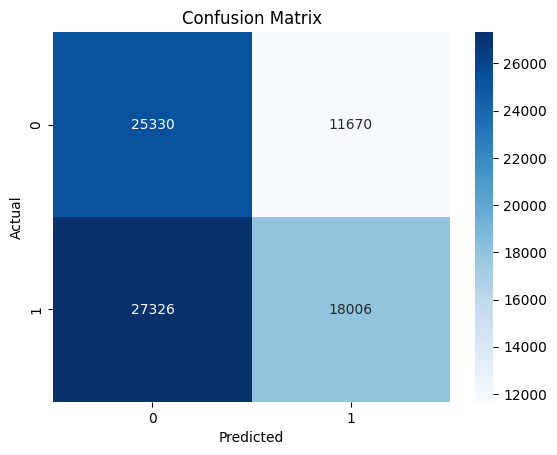

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
!pip install xgboost


In [14]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [15]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.66      0.57     37000
           1       0.62      0.45      0.52     45332

    accuracy                           0.54     82332
   macro avg       0.56      0.55      0.54     82332
weighted avg       0.56      0.54      0.54     82332

Confusion Matrix:
 [[24408 12592]
 [24960 20372]]


<Axes: xlabel='label', ylabel='count'>

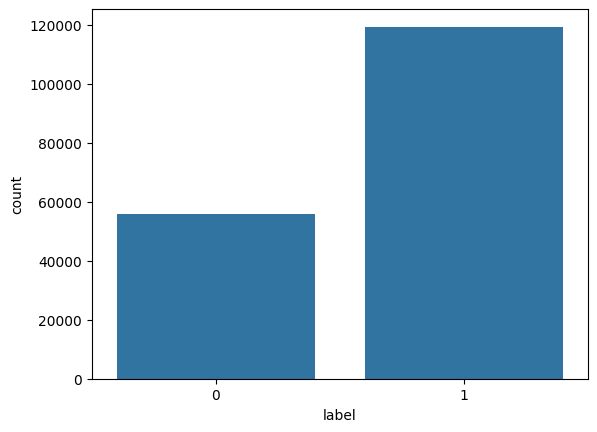

In [16]:
import seaborn as sns
sns.countplot(x=y_train)


In [17]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 119341, 1: 119341})


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)

print("LR Report:\n", classification_report(y_test, y_pred_lr))


LR Report:
               precision    recall  f1-score   support

           0       0.58      0.76      0.65     37000
           1       0.73      0.55      0.63     45332

    accuracy                           0.64     82332
   macro avg       0.66      0.65      0.64     82332
weighted avg       0.66      0.64      0.64     82332



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=256, validation_split=0.1)

y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("ANN Report:\n", classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8988 - loss: 0.2260 - val_accuracy: 0.9314 - val_loss: 0.1488
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9487 - loss: 0.1148 - val_accuracy: 0.9336 - val_loss: 0.1371
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9523 - loss: 0.1027 - val_accuracy: 0.9344 - val_loss: 0.1306
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9552 - loss: 0.0955 - val_accuracy: 0.9646 - val_loss: 0.0823
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9591 - loss: 0.0869 - val_accuracy: 0.9516 - val_loss: 0.0931
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9636 - loss: 0.0791 - val_accuracy: 0.9585 - val_loss: 0.0830
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9658 - loss: 0.0743 - val_accuracy: 0.9624 - val_loss: 0.0813
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9672 - loss: 0.0716 - val_accuracy: 0.